# Step 0: Enable GPUs
First, you'll need to enable GPUs for the notebook:

*   Navigate to Edit→Notebook Settings
*   select GPU from the Hardware Accelerator drop-down

# Step 1: Installation
It takes about 30 minutes. 

In [1]:
!pip install torch torchvision torchaudio
!pip install tensorflow
!pip install "modelscope[cv]" -f https://modelscope.oss-cn-beijing.aliyuncs.com/releases/repo.html
!pip install git+https://github.com/NVlabs/nvdiffrast.git
!pip install git+https://github.com/facebookresearch/pytorch3d.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://modelscope.oss-cn-beijing.aliyuncs.com/releases/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.8/952.8 kB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 28.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 kB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━

# Step 2: Model initialization
Initialize the pipeline and download the pretrained weights from modelscope.

In [2]:
import os
import cv2
from moviepy.editor import ImageSequenceClip
from modelscope.models.cv.face_reconstruction.utils import write_obj
from modelscope.outputs import OutputKeys
from modelscope.pipelines import pipeline
from modelscope.utils.constant import Tasks

face_reconstruction = pipeline(Tasks.face_reconstruction, model='damo/cv_resnet50_face-reconstruction', model_revision='v2.0.0-HRN')

2023-05-05 06:48:09,511 - modelscope - INFO - PyTorch version 2.0.0+cu118 Found.
2023-05-05 06:48:09,515 - modelscope - INFO - TensorFlow version 2.12.0 Found.
2023-05-05 06:48:09,518 - modelscope - INFO - Loading ast index from /root/.cache/modelscope/ast_indexer
2023-05-05 06:48:09,520 - modelscope - INFO - No valid ast index found from /root/.cache/modelscope/ast_indexer, generating ast index from prebuilt!
2023-05-05 06:48:09,572 - modelscope - INFO - Loading done! Current index file version is 1.5.2, with md5 ecac0576d64717f2fd5d2f4631cf4ef5 and a total number of 860 components indexed
2023-05-05 06:48:13,232 - modelscope - INFO - Use user-specified model revision: v2.0.0-HRN
Downloading: 100%|██████████| 6.00k/6.00k [00:00<00:00, 2.19MB/s]
Downloading: 100%|██████████| 91.9M/91.9M [00:08<00:00, 11.1MB/s]
Downloading: 100%|██████████| 21.5k/21.5k [00:00<00:00, 106kB/s] 
Downloading: 100%|██████████| 121M/121M [00:11<00:00, 10.8MB/s]
Downloading: 100%|██████████| 3.00M/3.00M [00:01

initialize network with normal
initialize network with normal


2023-05-05 06:51:08,092 - modelscope - WARNING - No preprocessor field found in cfg.
2023-05-05 06:51:08,096 - modelscope - WARNING - No val key and type key found in preprocessor domain of configuration.json file.
2023-05-05 06:51:08,099 - modelscope - WARNING - Cannot find available config to build preprocessor at mode inference, current config: {'model_dir': '/root/.cache/modelscope/hub/damo/cv_resnet50_face-reconstruction'}. trying to build by task and model information.
2023-05-05 06:51:08,100 - modelscope - WARNING - No preprocessor key ('face_reconstruction', 'face-reconstruction') found in PREPROCESSOR_MAP, skip building preprocessor.


loading the model from /root/.cache/modelscope/hub/damo/cv_resnet50_face-reconstruction/pytorch_model.pt


# Step 3: Run

In [3]:
def save_results(result, save_root):
    os.makedirs(save_root, exist_ok=True)

    # export obj and texture
    mesh = result[OutputKeys.OUTPUT]['mesh']
    texture_map = result[OutputKeys.OUTPUT_IMG]
    mesh['texture_map'] = texture_map
    write_obj(os.path.join(save_root, 'hrn_mesh_mid.obj'), mesh)

    # export rotation video
    frame_list = result[OutputKeys.OUTPUT]['frame_list']
    video = ImageSequenceClip(sequence=frame_list, fps=30)
    video.write_videofile(
        os.path.join(save_root, 'rotate.mp4'), fps=30, audio=False)
    del frame_list

    # save visualization image
    vis_image = result[OutputKeys.OUTPUT]['vis_image']
    cv2.imwrite(os.path.join(save_root, 'vis_image.jpg'), vis_image)

    print(f'Output written to {os.path.abspath(save_root)}')

result = face_reconstruction('https://modelscope.oss-cn-beijing.aliyuncs.com/test/images/face_reconstruction.jpg')
save_results(result, './face_reconstruction_results')

Moviepy - Building video ./face_reconstruction_results/rotate.mp4.
Moviepy - Writing video ./face_reconstruction_results/rotate.mp4



Moviepy - Done !
Moviepy - video ready ./face_reconstruction_results/rotate.mp4
Output written to /content/face_reconstruction_results


# Step 4: Visualize results

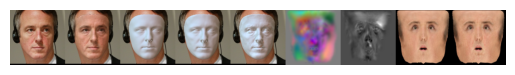

In [4]:
from matplotlib import pyplot as plt
def vis_img(path):
  img = cv2.imread(path,-1)
  plt.imshow(img[..., ::-1])
  plt.axis("off")
  plt.show()

vis_img('./face_reconstruction_results/vis_image.jpg')